In [48]:
import sys
import os
import pandas as pd
import numpy as np
from pandas import ExcelWriter
from pandas import ExcelFile

import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import seaborn as sns

from statistics import mean 
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

import importlib
from ast import literal_eval
import more_itertools

import telomere_methods_rad_patient as telo_mrp

In [49]:
# importlib.reload(telo_mrp)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
%reload_ext autoreload

#### Extracting telomere length data from all radiation therapy patients

In [2]:
all_patients_dict = telo_mrp.generate_dictionary_from_TeloLength_and_Chr_aberr_Data('..')

SW9A non irrad.xlsx data extraction in progress..
BJ1 for SW9_.xlsx data extraction in progress..
SW11A non irrad.xlsx data extraction in progress..
BJ1 for SW15_.xlsx data extraction in progress..
SW6A non irrad.xlsx data extraction in progress..
SW6A irrad @ 4 Gy.xlsx data extraction in progress..
SW8B.xlsx data extraction in progress..
SW14A irrad @ 4 Gy.xlsx data extraction in progress..
SW8A irrad @ 4 Gy.xlsx data extraction in progress..
SW5A irrad @ 4 Gy.xlsx data extraction in progress..
SW8C.xlsx data extraction in progress..
SW1A non irrad.xlsx data extraction in progress..
BJ1 for SW11_.xlsx data extraction in progress..
SW16A non irrad.xlsx data extraction in progress..
BJ1 for SW13_.xlsx data extraction in progress..
BJ-hTERT for SW9_.xlsx data extraction in progress..
BJ1 for SW14_.xlsx data extraction in progress..
SW9B.xlsx data extraction in progress..
BJ1 for SW8_.xlsx data extraction in progress..
SW_1_ok_3_C_.xlsx data extraction in progress..


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:2275: RuntimeWarning: Mean of empty slice.
  mns = a.mean(axis=axis)
/usr/local/lib/python3.7/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/usr/local/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.7/site-packages/numpy/core/_methods.py:130: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


SW3A irrad @ 4 Gy.xlsx data extraction in progress..
SW11A irrad @ 4 Gy.xlsx data extraction in progress..
BJ1 for SW16_.xlsx data extraction in progress..
BJ1 for SW12_.xlsx data extraction in progress..
SW8A non irrad.xlsx data extraction in progress..
BJ-hTERT for SW8_.xlsx data extraction in progress..
SW10A non irrad.xlsx data extraction in progress..
SW12A irrad @ 4 Gy.xlsx data extraction in progress..
SW9C.xlsx data extraction in progress..
BJ1 for SW10_.xlsx data extraction in progress..
SW7A non irrad.xlsx data extraction in progress..
SW1A irrad @ 4 Gy.xlsx data extraction in progress..
SW13A irrad @ 4 Gy.xlsx data extraction in progress..
SW1B.xlsx data extraction in progress..
BJ-hTERT for SW6_.xlsx data extraction in progress..
SW13B.xlsx data extraction in progress..
BJ1 for SW2_.xlsx data extraction in progress..
SW2A non irrad.xlsx data extraction in progress..
SW5C.xlsx data extraction in progress..
SW15C.xlsx data extraction in progress..
SW7C.xlsx data extraction in

In [254]:
# # saving data to csv file for later retrieval

# copy_all_patients_df = all_patients_df
# copy_all_patients_df['telo data'] = copy_all_patients_df['telo data'].apply(lambda row: row.tolist())
# copy_all_patients_df.to_csv('copy_all_patients_df.csv')

In [4]:
# # retrieving data

# all_patients_df2 = pd.read_csv('copy_all_patients_df.csv', index_col=0)
# all_patients_df2['telo data'] = all_patients_df2['telo data'].apply(lambda row: np.array(literal_eval(row)))
# all_patients_df = all_patients_df2

#### Making a Dataframe from all the telomere length data & calculating # of individual telomeres in quartiles

In [4]:
# sns.set_style(style="darkgrid")
all_patients_df = telo_mrp.generate_dataframe_from_dict_and_generate_histograms_stats(all_patients_dict)

To display graphs pass the value "yes graphs" to the function otherwise default option="no graphs"


In [33]:
all_patients_df = telo_mrp.calculate_apply_teloQuartiles_dataframe(all_patients_df)
all_patients_df = all_patients_df.drop(['cell data'], axis=1)
all_patients_df.head(4)

,patient id,timepoint,telo data,chr data,status,telo means,Q1,Q2-3,Q4
0,1,1 non irrad,0 47.513966 1 49.625698 2 ...,chr data,IT WORKS PEGGY <333,84.796738,[1195],[2214],[1191]
1,1,2 irrad @ 4 Gy,0 78.134078 1 92.916201 2 ...,chr data,IT WORKS PEGGY <333,90.975987,[724],[2343],[1533]
2,1,3 B,0 53.849162 1 104.530726 2 ...,chr data,IT WORKS PEGGY <333,116.780229,[231],[1448],[2921]
3,1,4 C,0 57.016760 1 68.631285 2 ...,chr data,IT WORKS PEGGY <333,99.346663,[372],[2210],[2018]


In [20]:
### MELT Q1, Q2-3, Q4 COLUMNS INTO ONE.. the relative Q && make new column Q freq counts for it
### relative Q refers to which quartile, ala Q1 <0.25, Q2-3 >0.25 & <0.75, Q4 > 0.75
### Q FREQ COUNTS: counts the number of individual telomeres for each timepoint within the quartiles established 
### by the non irradiated timepoint for each patient 

melted_all_patients_df = pd.melt(
    all_patients_df,
    id_vars = [col for col in all_patients_df.columns if col != 'Q1' and col != 'Q2-3' and col != 'Q4'],
    var_name='relative Q',
    value_name='Q freq counts')

melted_all_patients_df['Q freq counts'] = melted_all_patients_df['Q freq counts'].astype('float64')
melted_all_patients_df.head(4)

,patient id,timepoint,telo data,cell data,chr data,status,telo means,relative Q,Q freq counts
0,1,1 non irrad,0 47.513966 1 49.625698 2 ...,0 82.196867 1 81.703364 2 84.30859...,chr data,IT WORKS PEGGY <333,84.796738,Q1,1195.0
1,1,2 irrad @ 4 Gy,0 78.134078 1 92.916201 2 ...,0 89.840418 1 88.876370 2 93.16309...,chr data,IT WORKS PEGGY <333,90.975987,Q1,724.0
2,1,3 B,0 53.849162 1 104.530726 2 ...,0 114.272859 1 116.852232 2 110.87...,chr data,IT WORKS PEGGY <333,116.780229,Q1,231.0
3,1,4 C,0 57.016760 1 68.631285 2 ...,0 95.200085 1 101.810724 2 96.63...,chr data,IT WORKS PEGGY <333,99.346663,Q1,372.0


#### Generate a dataframe with timepoints as columns, and telomere length means for each patient timepoint sample in rows

In [21]:
#make columns timepoints containing MEANS of telomeres

pivot_all_patients_df = all_patients_df.pivot(index='patient id', columns='timepoint', values='telo means')
pivot_all_patients_df = pivot_all_patients_df.drop(13)

print(pivot_all_patients_df.shape)
pivot_all_patients_df.head(4)

(14, 4)


timepoint,1 non irrad,2 irrad @ 4 Gy,3 B,4 C
patient id,,,,
1,84.796738,90.975987,116.780229,99.346663
2,119.774143,133.199629,159.828115,108.915685
3,83.351204,87.295754,101.433049,95.669819
5,85.506373,113.096219,118.340987,97.832439


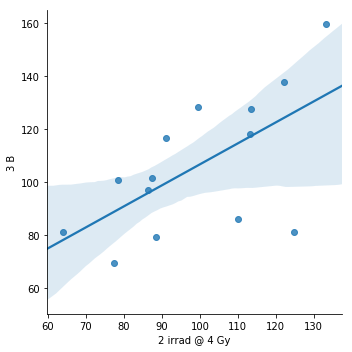

In [22]:
sns.lmplot(x='2 irrad @ 4 Gy', y='3 B', fit_reg=True, data=pivot_all_patients_df)

In [24]:
### LINEAR REGRESSION BETWEEN ALL TELO MEANS vs. 4 C

X = pivot_all_patients_df[['1 non irrad', '2 irrad @ 4 Gy', '3 B']]
# X = np.log(X)

y = pivot_all_patients_df['4 C']
# y = np.log(y)

model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# # # # Print out the statistics
# model.summary()

In [38]:
# MAKING DATAFRAME FOR ONLY INDIVIDUAL TELOMERE LENGTH MEASUREMENTS.. 
# shape (4601, 56)

#objective is dataframe for only individual telos

#drop patient 13, missing 3 mth post rad ther timepoint
all_patients_df_copy = all_patients_df.drop([44, 45, 46], axis=0)

#taking all_patients_df, removing the index & making a multi index of patient id and timepoint
individ_telos_cols = all_patients_df_copy.reindex().set_index(['patient id', 'timepoint']) 

#removing unnecessary columns
individ_telos_cols.drop(['chr data', 'status', 'telo means', 'Q1', 'Q2-3', 'Q4'], axis=1, inplace=True)

#exploding the series containing the individual telos
explode_individ_telos_cols = individ_telos_cols['telo data'].apply(pd.Series)

#transpose!
explode_individ_telos_cols = explode_individ_telos_cols.reset_index(level=['patient id']).T

print(explode_individ_telos_cols.shape)
explode_individ_telos_cols.head(5)


(4601, 56)


timepoint,1 non irrad,2 irrad @ 4 Gy,3 B,4 C,1 non irrad,2 irrad @ 4 Gy,3 B,4 C,1 non irrad,2 irrad @ 4 Gy,...,3 B,4 C,1 non irrad,2 irrad @ 4 Gy,3 B,4 C,1 non irrad,2 irrad @ 4 Gy,3 B,4 C
patient id,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,...,14.000000,14.000000,15.000000,15.000000,15.000000,15.000000,16.000000,16.000000,16.000000,16.000000
0,47.513966,78.134078,53.849162,57.016760,138.656725,186.842396,140.623488,117.022343,91.306295,57.309270,...,46.466297,90.912320,41.748958,55.341642,59.225266,99.032411,45.689407,47.865093,60.919209,80.500383
1,49.625698,92.916201,104.530726,68.631285,160.291108,80.637245,137.673344,58.262351,109.761822,100.048387,...,110.104921,81.821088,71.847044,82.154216,81.556103,56.312548,58.743523,60.919209,68.534110,53.201833
2,51.737430,83.413408,127.759776,129.871508,93.421198,136.689963,113.088819,62.936386,118.503914,54.395239,...,78.790677,95.963004,66.021608,121.363249,103.886941,117.479625,58.743523,34.810976,90.290970,108.784301
3,88.692737,137.262570,96.083799,63.351955,246.828639,160.291108,111.122057,75.720339,107.819135,78.678828,...,92.932594,117.175879,44.661676,71.847044,86.410633,74.759762,30.459604,41.338035,52.216465,94.642342


In [11]:
# MAKING DATAFRAME FOR MEANS OF INDIVIDUAL CELLS
# shape (51, 56)

all_patients_df_copy = all_patients_df.drop([44, 45, 46], axis=0)

#taking all_patients_df, removing the index & making a multi index of patient id and timepoint
individ_cell_cols = all_patients_df_copy.reindex().set_index(['patient id', 'timepoint']) 

#removing unnecessary columns
individ_cell_cols.drop(['chr data', 'telo data', 'status', 'telo means', 'Q1', 'Q2-3', 'Q4'], axis=1, inplace=True)

#exploding the series containing the individual telos
explode_cells = individ_cell_cols['cell data'].apply(pd.Series)

#transpose!
explode_cells = explode_cells.reset_index(level=['patient id']).T

print(explode_cells.shape)
explode_cells.head(5)

(51, 56)


timepoint,1 non irrad,2 irrad @ 4 Gy,3 B,4 C,1 non irrad,2 irrad @ 4 Gy,3 B,4 C,1 non irrad,2 irrad @ 4 Gy,...,3 B,4 C,1 non irrad,2 irrad @ 4 Gy,3 B,4 C,1 non irrad,2 irrad @ 4 Gy,3 B,4 C
patient id,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,...,14.000000,14.000000,15.000000,15.000000,15.000000,15.000000,16.000000,16.000000,16.000000,16.000000
0,82.196867,89.840418,114.272859,95.200085,116.550706,133.290885,161.990434,106.450524,84.180515,87.690213,...,99.602163,94.107427,71.931470,80.836405,68.923602,92.544418,57.872199,61.027173,81.180371,73.320473
1,81.703364,88.876370,116.852232,101.810724,117.147062,127.069932,158.099879,108.050891,88.371148,87.621886,...,100.152962,93.063556,73.735130,77.297831,72.385263,92.320496,57.466490,66.319543,82.363218,75.181566
2,84.308598,93.163095,110.875476,96.637261,111.627037,136.938565,165.122952,112.027322,89.881918,87.251991,...,98.224833,92.471444,71.942023,74.724630,69.989658,91.624593,57.997881,61.919308,79.909164,75.158920
3,82.828091,92.067376,117.507987,95.403284,115.488103,138.143657,163.514569,111.752553,89.859837,86.923049,...,100.451097,91.754353,70.517324,76.479954,70.284951,94.146221,56.655704,65.424876,81.351738,79.868584


In [36]:
X = explode_cells_4_cols[['1 non irrad', '2 irrad @ 4 Gy', '3 B']]
X = np.log(X)

y = explode_cells_4_cols['4 C']
y = np.log(y)

model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# # # # # Print out the statistics
# model.summary()

(64400, 3)
(64400, 1)


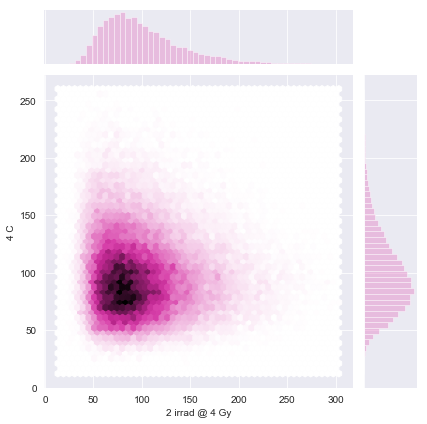

In [270]:
# playing with data.. OBJECTIVES: keras.. jointplots..
# https://towardsdatascience.com/quantile-regression-from-linear-models-to-trees-to-deep-learning-af3738b527c3
# https://towardsdatascience.com/normalization-vs-standardization-quantitative-analysis-a91e8a79cebf

X = explode_individ_telos_cols[['1 non irrad', '2 irrad @ 4 Gy', '3 B']].iloc[1:].values.reshape(64400, 3)
print(X.shape)
y = explode_individ_telos_cols['4 C'].iloc[1:].values.reshape(-1, 1)
print(y.shape)

# X = np.log(X)
# y = np.log(y)

features = pd.DataFrame(X, columns=['1 non irrad', '2 irrad @ 4 Gy', '3 B'])
target = pd.DataFrame(y, columns=['4 C'])

exploded_telos_4_cols = features.merge(target, left_index=True, right_index=True)
sns.jointplot(x='2 irrad @ 4 Gy', y='4 C', kind='hex', color='tab:pink', data=exploded_telos_4_cols)

In [294]:
### linear regression between ... individual telos quantified for in vitro vs in vivo response 

### omnibus is super high.. pretty sure linear regression between individual telos is inappropriate

X = explode_individ_telos_cols['2 irrad @ 4 Gy'].iloc[1:].values.reshape(-1,1)
y = explode_individ_telos_cols['3 B'].iloc[1:].values.reshape(-1,1)

# model = sm.OLS(y, X).fit(random_state=1)
# predictions = model.predict(X) # make the predictions by the model

# # # # Print out the statistics
# model.summary()

In [40]:
### machine learning models.. between ... individual telos of timepoints vs. mean of 3 mths after therapy?

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import median_absolute_error

In [52]:
#automating application
# the means of timepoints are ordered.. therefore the linear regression approaches seem appropriate

# the individual telomere length measurements / cell means are NOT ordered.. therefore 
# linear regression / XGboost / random forest may be inappropriate..
# i need to research machine learning approaches for unstructured/un ordered data 

X = pivot_all_patients_df[['1 non irrad', '2 irrad @ 4 Gy', '3 B']].values.reshape(14, 3)
y = pivot_all_patients_df['4 C'].values.reshape(-1, )

X2 = explode_individ_telos_cols[['1 non irrad', '2 irrad @ 4 Gy', '3 B']].iloc[1:].values.reshape(64400, 3)
y2 = explode_individ_telos_cols['4 C'].iloc[1:].values.reshape(-1, )


models = [XGBRegressor, RandomForestRegressor]
data_X = [X, X2]
data_y = [y, y2]


concat_list = []
for X, y in zip(data_X, data_y):    
    
    score_df, score_list = telo_mrp.score_model_accuracy_metrics(models, X, y)
    
    if concat_list == []:
        concat_list = score_list
    else:
        concat_list = concat_list + score_list
    
pd.DataFrame(concat_list, columns=['model', 'model name', 'mean absolute error', 'explained variance'])

,model,model name,mean absolute error,explained variance
0,"XGBRegressor(base_score=0.5, booster='gbtree',...",<class 'xgboost.sklearn.XGBRegressor'>,3.604786,0.273782
1,"(DecisionTreeRegressor(criterion='mse', max_de...",<class 'sklearn.ensemble.forest.RandomForestRe...,4.284393,0.189489
2,"XGBRegressor(base_score=0.5, booster='gbtree',...",<class 'xgboost.sklearn.XGBRegressor'>,26.006472,0.037674
3,"(DecisionTreeRegressor(criterion='mse', max_de...",<class 'sklearn.ensemble.forest.RandomForestRe...,26.672518,-0.012759


In [46]:
# PROBLEM.. unable to plot categorical values against lists of values, i.e directly plotting timepoints agaisnt the
# individual telomere length measurements stored in each row... solution? explode individual telomere length measurement lists
# so that EACH individual telomere is associated with it's corresponding timepoints.. we'll go from a dataframe with
# 59 rows to >277,000.. pretty cool!

explode_telos_raw = all_patients_df['telo data'].apply(pd.Series)

In [53]:
# exploding individual telomere length measurements into dataframe while retaining all other columns
# allows for graphing individual telomere length measurements for each patient / timepoint 

# prior issues with melt.. this melt function was yielding [array] values in the telo data column for positions 271400 onwards to 271576 ... very strange! 
# the strange behavior observed w/ melting occurred from not properly controlling columns w/ id vars! FIXED :) 

exploded_telos_all_patients_df = (explode_telos_raw
    .merge(all_patients_df, right_index = True, left_index = True)
    .drop(['telo data', 'Q1', 'Q2-3', 'Q4'], axis = 1)
    .melt(id_vars = ['patient id', 'timepoint', 'chr data', 'status', 'telo means'], value_name = "telo data exploded") 
    .drop("variable", axis = 1)
    .dropna())

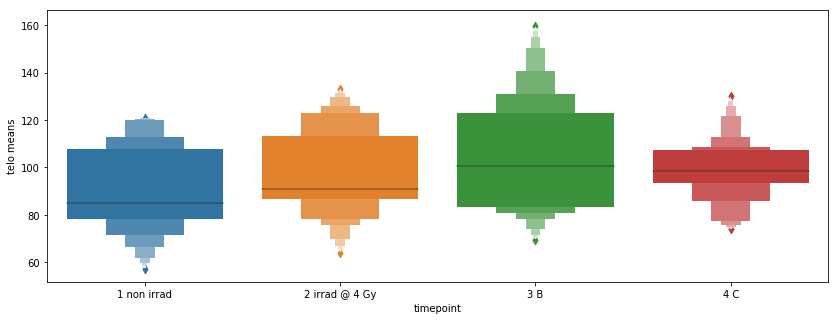

In [54]:
fig = plt.figure(figsize=(14,5))
sns.boxenplot(x='timepoint',y='telo means', data=all_patients_df)

### Telomere means of all patients grouped by timepoint

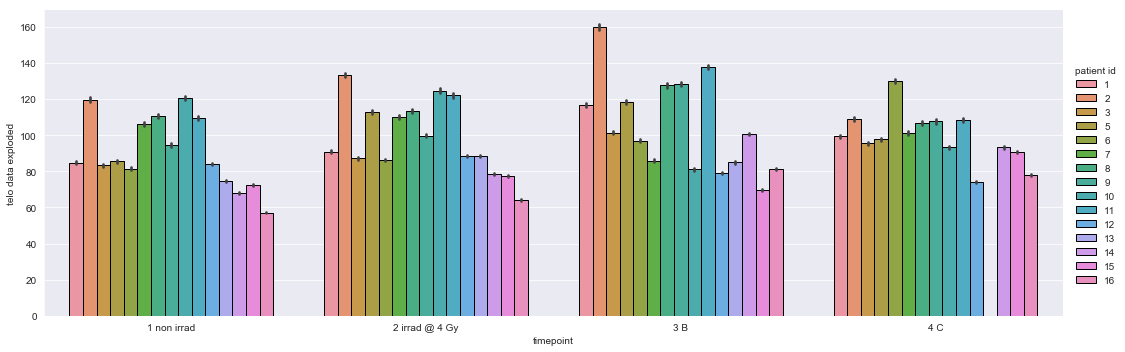

In [55]:
sns.set_style(style="darkgrid",rc= {'patch.edgecolor': 'black'})
sns.catplot(x='timepoint', y='telo data exploded', hue='patient id', kind='bar', height=5, aspect=3, data=exploded_telos_all_patients_df)

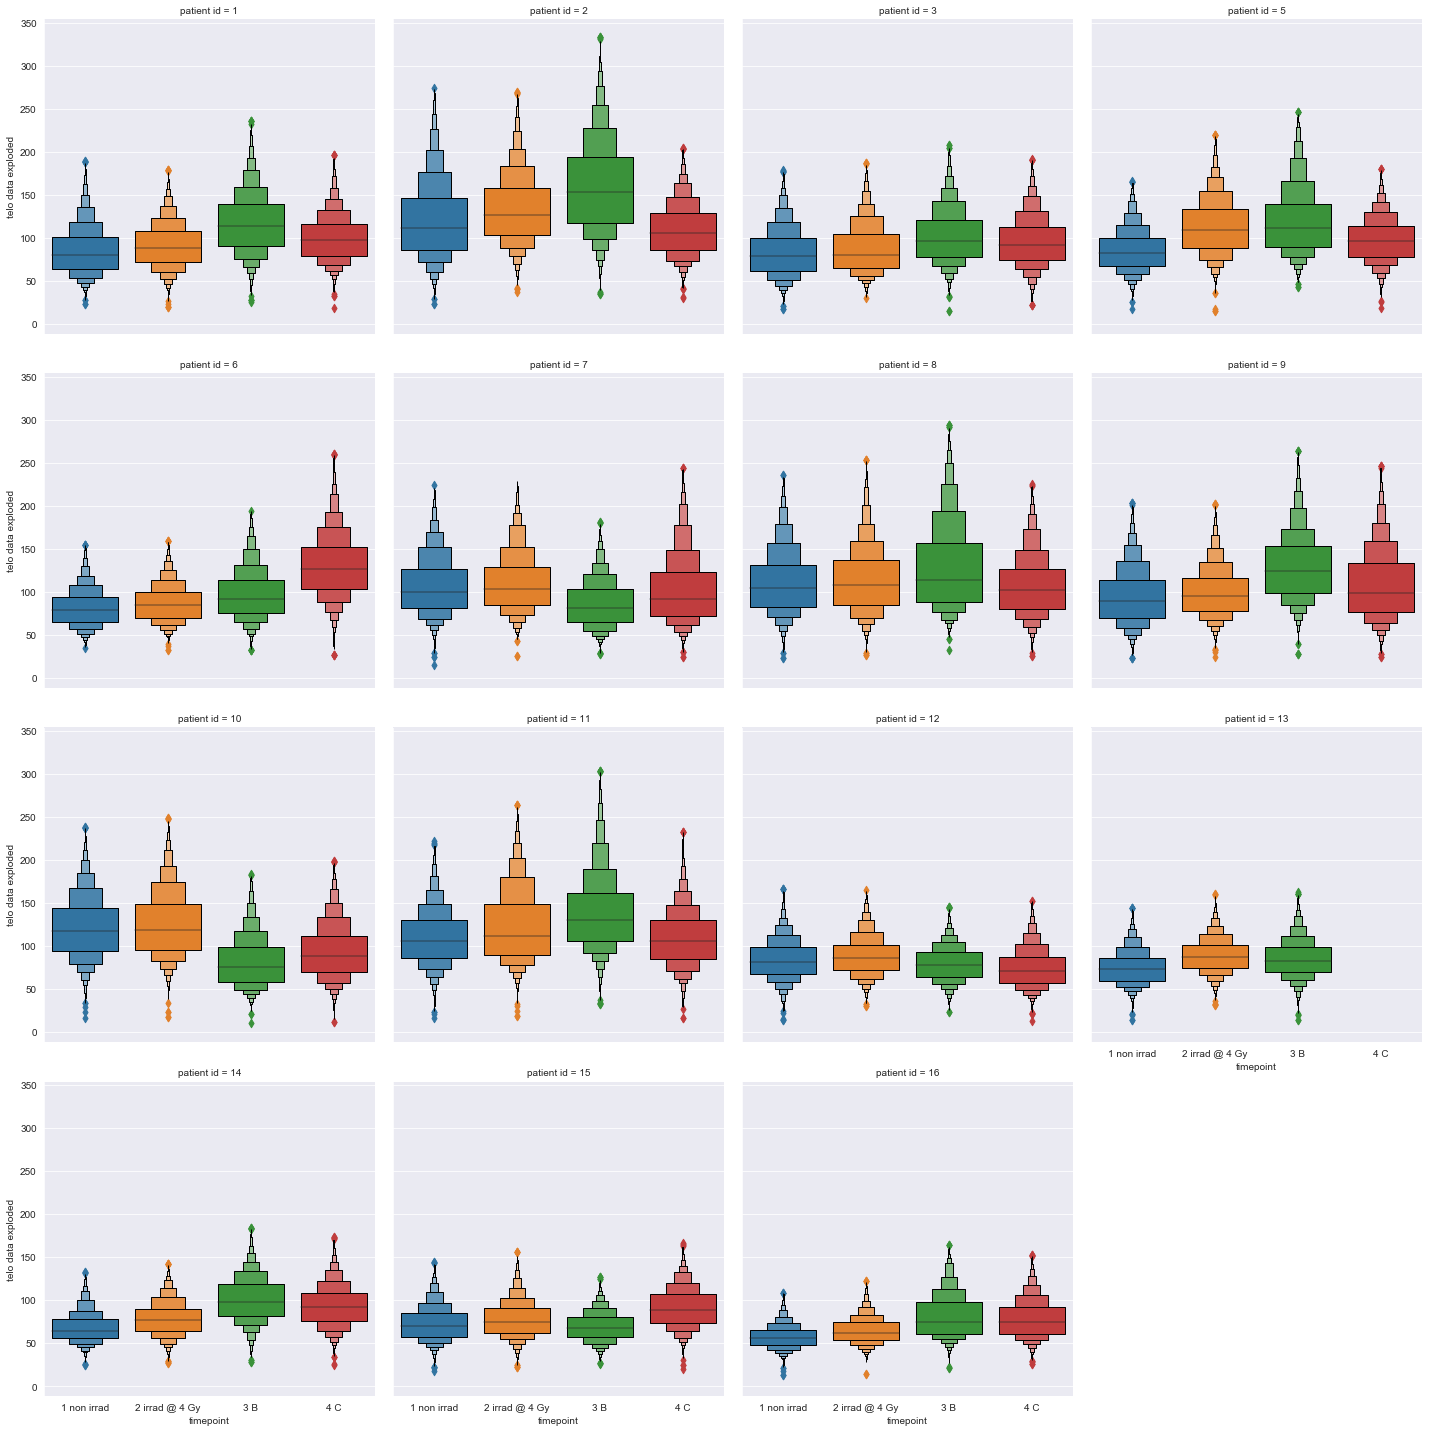

In [203]:
sns.set_style(style="darkgrid",rc= {'patch.edgecolor': 'black'})
sns.catplot(x='timepoint', y='telo data exploded', col='patient id', col_wrap=4, kind='boxen', data=exploded_telos_all_patients_df)

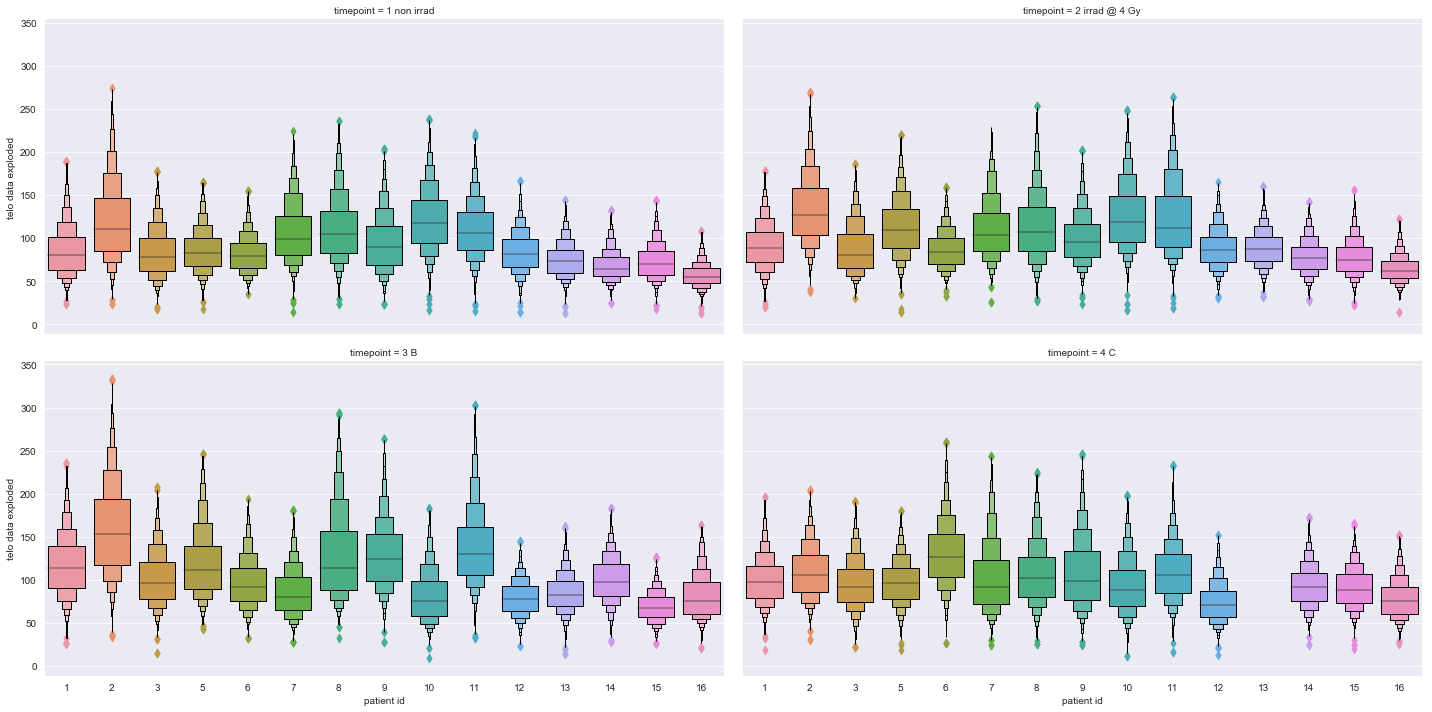

In [209]:
sns.catplot(x='patient id', y='telo data exploded', col='timepoint', height=5, aspect=2, col_wrap=2, kind='boxen', data=exploded_telos_all_patients_df)
# plt.savefig(f'lynn suggestion.pdf')

Text(0, 0.5, 'Individual Telos Within Pre-Rad Therapy Time point Quartiles')

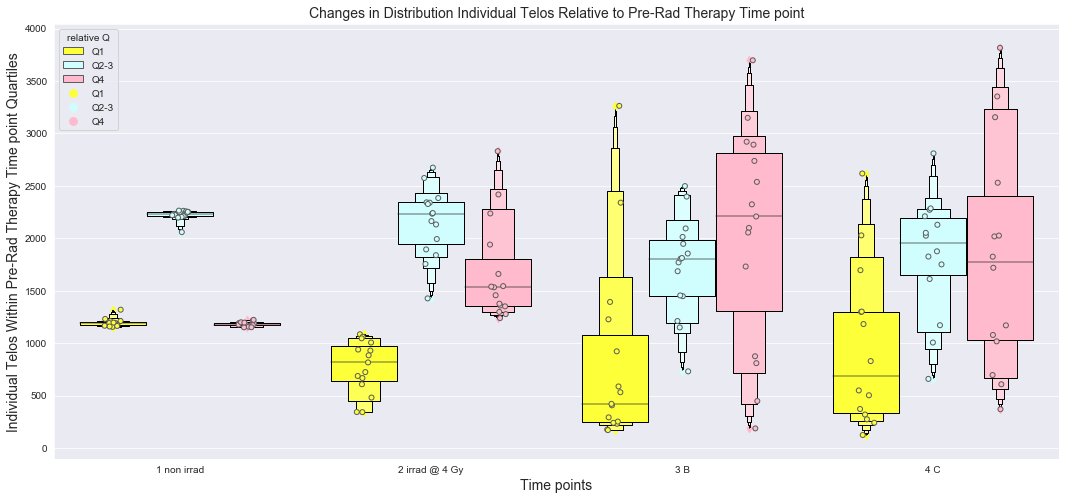

In [229]:
fig = plt.figure(figsize=(18,8))
sns.set_style(style="darkgrid",rc= {'patch.edgecolor': 'black'})
palette ={"Q1":"#fdff38","Q2-3":"#d0fefe","Q4":"#ffbacd"}

ax = sns.boxenplot(x='timepoint', y='Q freq counts', hue='relative Q', data=melted_all_patients_df, palette=palette,
             linewidth=2, saturation=5, color="black")
ax = sns.stripplot(x='timepoint', y='Q freq counts', hue='relative Q', data=melted_all_patients_df, palette=palette,
             linewidth=1, color="black", dodge=True)

# ax.set(xlabel='TESTING', ylabel='common ylabel')
# fig.ax.set(xlabel='ASD')

ax=fig.gca()
ax.set_title('Changes in Distribution Individual Telos Relative to Pre-Rad Therapy Time point', fontsize=14)
ax.set_xlabel('Time points', fontsize=14)
ax.set_ylabel('Individual Telos Within Pre-Rad Therapy Time point Quartiles', fontsize=14)

### Q freq counts represents the number of individual telomeres at each timepoint
### within the quartiles established by the non irrad timepoint for each patient

In [ ]:
### function graveyard, pending deletion (since stored in a module!)

In [ ]:
# def generate_dictionary_from_TeloLength_and_Chr_aberr_Data(patharg):

#     """
#     opens raw telomere length count excel files from imageJ analyses and
#     extracts the individual mean telomere lengths to make histograms;
#     opens chromosome rearrangement frequency files and extracts data
#     both telos & chr rearrangement frequencies are stored as values to their
#     sample timepoint keys, which themselves are values to patient id# key

#     i.e the data structure is:

#     dict = {
#     patient_IDnumber = 
#     {SW#A non irrad: [telos data, chr aberr data], 
#     SW#A irrad @ 4 Gy: [telos data, chr aberr data]},

#     etc.
#     }

#     i.e:

#     all_patients_dict = {
#     '1' = {
#     'SW1A non irrad': ['telomere data', 'chr aberr data'],
#     'SW1A irrad @ 4 Gy': ['telomere data', ' chr aberr data']},

#     etc. for patients 1 - 16 (less #4 missing)
#     }

#     pass the directory where the telomere length excel files (.xlsx) are located
#     """

#     all_patients_dict = {}

#     for file in os.scandir(patharg):
#         if file.name.endswith('.xlsx') and file.name.startswith('~$') == False:
        
#             try:
#                 df = pd.read_excel(file)

#             except:
#                 print('File not found..')
#                 return -1

#             print(file.name, 'data extraction in progress..') 
# #                   'it works peggy!! <3 <3 !!')
           
#             if 'chr' not in file.name:
                
#                 telo_data = extract_and_clean_telos(df, file.name)

#             else:
#                 continue

#             file = file.name.replace('.xlsx', '').rstrip()
#             data_list = []
#             file_chr = ''

            
#             num, num2 = capture_patient_sample_ID(file)

#             if 'chr' in file:
#                 file_chr = file
#                 file = file.replace('chr','').rstrip()

#             if file[num:num2] not in all_patients_dict.keys():
#                 all_patients_dict[file[num:num2]] = {file: []}

#                 if len(all_patients_dict[file[num:num2]][file]) == 0:
#                     all_patients_dict[file[num:num2]][file] = data_list
#                     if 'chr' not in file_chr:
#                         data_list.append(telo_data)
#                         data_list.sort()
#                     elif 'chr' in file_chr:
#                         data_list.append(chr_data)
#                         data_list.sort()

#                 elif len(all_patients_dict[file[num:num2]][file]) == 1:
#                     if 'chr' not in file_chr:
#                         data_list.append(telo_data)
#                         data_list.sort()
#                     elif 'chr' in file_chr:
#                         data_list.append(chr_data)
#                         data_list.sort()

#             elif file[num:num2] in all_patients_dict.keys():
#                 if file in all_patients_dict[file[num:num2]]:
#                     if 'chr' not in file_chr:
#                         all_patients_dict[file[num:num2]][file].append(telo_data)
#                         all_patients_dict[file[num:num2]][file].sort()
#                     elif 'chr' in file_chr:
#                         all_patients_dict[file[num:num2]][file].append(chr_data)
#                         all_patients_dict[file[num:num2]][file].sort()

#                 elif file not in all_patients_dict[file[num:num2]]:     
#                     all_patients_dict[file[num:num2]][file] = data_list
#                     if 'chr' not in file_chr:
#                         all_patients_dict[file[num:num2]][file].append(telo_data)
#                         all_patients_dict[file[num:num2]][file].sort()
#                     elif 'chr' in file_chr:
#                         all_patients_dict[file[num:num2]][file].append(chr_data)
#                         all_patients_dict[file[num:num2]][file].sort()
                        
#     print('completed file collection')
#     return all_patients_dict

In [23]:
# def gen_missing_values_andimpute_or_randomsampledown(n_cells, telosPercell, astro_df, option=None):
#     #if wanted to do for max. possible telomeres, just replace the subtraction with max telos
#     # print('substracts second astro from first.. equalizing second to first')

#     if astro_df.size > 4600:
#         astro_dfsampled = astro_df.sample(4600)
#         return astro_dfsampled

#     if astro_df.size > 25 and astro_df.size <= 2300:
#         missing_data_difference = abs( (n_cells * telosPercell) - astro_df.size )
#         rsampled = astro_df.sample(missing_data_difference, replace=True, random_state=28)
#         concat_ed = pd.concat([rsampled, astro_df], sort=False)
#         np.random.shuffle(concat_ed.to_numpy())
#         concat_ed.reset_index(drop=True, inplace=True)
#         return concat_ed

#     if astro_df.size > 25 and astro_df.size < 4600:
#         missing_data_difference = abs( (n_cells * telosPercell) - astro_df.size )
#         if option == 'rsamp':
#             rsampled = astro_df.sample(missing_data_difference, random_state=28)
#             concat_ed = pd.concat([rsampled, astro_df], sort=False)
#             np.random.shuffle(concat_ed.to_numpy())
#             concat_ed.reset_index(drop=True, inplace=True)
#             return concat_ed
#         else:
#             return astro_df
#     else:
#         return astro_df


In [24]:
# def histogram_stylizer_divyBins_byQuartile(fig, axs, n_bins, astroDF, astroquartile, astroname, axsNUMone, axsNUMtwo):

#         astroarray = astroDF.to_numpy()

#         N, bins, patches = axs[axsNUMone,axsNUMtwo].hist(astroarray, bins=n_bins, range=(0, 400), edgecolor='black')

#         for a in range(len(patches)):
#             if bins[a] <= np.quantile(astroquartile, 0.25):
#                 patches[a].set_facecolor('#fdff38')

#             elif np.quantile(astroquartile, 0.25) < bins[a] and bins[a] <= np.quantile(astroquartile, 0.50):
#                 patches[a].set_facecolor('#d0fefe')

#             elif np.quantile(astroquartile, 0.50) < bins[a] and bins[a] <= np.quantile(astroquartile, 0.75):
#                 patches[a].set_facecolor('#d0fefe')

#             elif bins[a] > np.quantile(astroquartile, 0.75): 
#                 patches[a].set_facecolor('#ffbacd')


#         axs[axsNUMone,axsNUMtwo].set_title('Histogram of ' + astroname + 's Telomeres')
#         axs[axsNUMone,axsNUMtwo].set_xlabel('Bins of Individ. Telomeres')
#         axs[axsNUMone,axsNUMtwo].set_ylabel('Freqs of Individ. Telomeres')
#         axs[axsNUMone,axsNUMtwo].xaxis.set_major_locator(plt.MaxNLocator(12))

In [25]:
# def capture_patient_sample_ID(file):
#     """
#     # print(len('SW2A non irrad'),
# #       len('BJ1 for SW2_'),
# #       len('BJ-hTERT for SW2_'),
# #       len('SW10A non irrad'),
# #       len('BJ1 for SW10_'),
# #       len('BJ-hTERT for SW10_'),
# #       len('SW8B'),
# #       len('SW14B'),
# #       len('SW1A irrad @ 4 Gy'),
# #       len('SW12A irrad @ 4 Gy'))

# # 14 12 17 15 13 18 4 5 17 18

# empty = []
# for file in files:
#     num, num2 = capture_patient_sample_ID(file)
#     empty.append(file[num:num2])
# print(empty)

# # ['2', '2', '2', '10', '10', '10', '8', '15', '1', '12']
#     """

#     if len(file) == 14:
#         #it's patient id w/ 1 sample ID digit
#         num = 2
#         num2 = num + 1
#         return num, num2

#     elif len(file) == 12:
#         #it's BJ1 ctrl w/ 1 sample ID digit
#         num = 10
#         num2 = num+ 1
#         return num, num2

#     elif 'hTERT' in file and len(file) == 17:
#         #it's BJ-hTERT w/ 1 sample digit
#         num = 15
#         num2 = num + 1
#         return num, num2

#     elif len(file) == 15:
#         #it's patient id w/ 2 sample ID digits
#         num = 2
#         num2 = num + 2
#         return num, num2

#     elif len(file) == 13:
#         #it's BJ1 ctrl w/ 2 sample ID digits
#         num = 10
#         num2 = num + 2
#         return num, num2

#     elif 'hTERT' in file and len(file) == 18:
#         # it's BJ-hTERT w/ 2 sample digits
#         num = 15
#         num2 = num + 2
#         return num, num2
    
#     elif len(file) == 4:
#         #it's 2nd/3rd patient timepoint w/ 1 sample digit
#         num = 2
#         num2 = num + 1
#         return num, num2
    
#     elif len(file) == 5:
#         #it's 2nd/3rd patient timepoint w/ 2 sample digits
#         num = 2
#         num2 = num + 2
#         return num, num2
    
#     elif '4 Gy' in file and len(file) == 17:
#         # irrad @ 4 Gy 1 sample ID digit
#         num = 2
#         num2 = num + 1
#         return num, num2
    
#     elif '4 Gy' in file and len(file) == 18:
#         # irrad @ 4 Gy 2 sample ID digits
#         num = 2
#         num2 = num + 2
#         return num, num2

In [26]:
# def extract_and_clean_telos(df, file_name):

#     df.rename(columns={'Unnamed: 3':'Mean Individ Telos'}, inplace=True)
#     mean_values_of_individual_telomere_lengths = (df['Mean Individ Telos'])
#     mean_values_of_individual_telomere_lengths = mean_values_of_individual_telomere_lengths.drop(labels=[5, 192, 379, 566, 753, 940, 1127, 1314,
#         1501, 1688, 1875, 2062, 2249, 2436, 2623, 2810, 2997, 3184, 3371, 3558, 3745, 3932, 4119, 4306, 4493, 4680, 4867, 5054, 5241, 5428,
#         5615, 5802, 5989, 6176, 6363, 6550, 6737, 6924, 7111, 7298, 7485, 7672, 7859, 8046, 8233, 8420, 8607, 8794, 8981, 9168])

#     mean_values_of_individual_telomere_lengths = mean_values_of_individual_telomere_lengths.iloc[6:9350]
#     meantelos_str_toNaN = pd.to_numeric(mean_values_of_individual_telomere_lengths, errors='coerce')
#     mean_individual_telos_cleaned = meantelos_str_toNaN.dropna(axis=0, how='any')
#     mean_individ_df = mean_individual_telos_cleaned.to_frame(name=None)
#     mean_individ_df.reset_index(drop=True, inplace=True)
    
#     if 'BJ1' not in file_name and 'hTERT' not in file_name:
#         telo_data = mean_individ_df[(np.abs(stats.zscore(mean_individ_df)) < 3).all(axis=1)]
#         return telo_data
#     else:
#         return mean_individ_df
    
 

In [27]:
# ### FIND QUARTILES OF NON IRRAD TIMEPOINT & MAKE BASELINE..
# ### find individual telomeres below the 0.25 percentile (a), between
# ### the 0.25 & 0.75 percentile (b), & above the 0.75 percentile (c)

# def quartile_cts_rel_to_df1(df1, df2):
#     df1 = pd.DataFrame(df1)
#     df2 = pd.DataFrame(df2)
    
#     quartile_1 = df2[df2 <= df1.quantile(0.25)].count()
    
#     quartile_2_3 = df2[(df2 > df1.quantile(0.25)) & (df2 < df1.quantile(0.75))].count()

#     quartile_4 = df2[df2 >= df1.quantile(0.75)].count()
    
#     return quartile_1.values, quartile_2_3.values, quartile_4.values

In [29]:
# def generate_dataframe_from_dict_and_generate_histograms_stats(all_patients_dict, graph_option='no graphs'):

#     data = []
#     print('To display graphs pass the value "yes graphs" to the functions argument "graph_option"',
#           'otherwise option="no graphs"')

#     for i in range(1,17):
#         if str(i) in all_patients_dict.keys():
#             for sample in sorted(all_patients_dict[str(i)].keys()):
#                 telos = all_patients_dict[str(i)][sample][0]
#                 # chr = all_patients_dict[str(i)[timepoint][1]
#                 chr_d = 'chr data'
#                 working_status = 'IT WORKS PEGGY <333'
            
        
#                 if 'hTERT' in sample:
#                     #average of all hTERT samples is 79.9762
#                     #CF = correction factor
#                     hTERT_avg = 79.9762
#                     hTERT_CF1 = hTERT_avg / telos['Mean Individ Telos'].mean()
                
#                 elif 'BJ1' in sample:
#                     #average of all BJ1 samples is 69.5515
#                     #CF = correction factor
#                     BJ1_avg = 69.5515
#                     BJ1_CF2 = BJ1_avg / telos['Mean Individ Telos'].mean()
   
#                     CF_mean = (hTERT_CF1 + BJ1_CF2) / 2
            
#                 elif 'non irrad' in sample:
#                     num, num2 = capture_patient_sample_ID(sample)
#                     SW_A_nonRAD_name = sample
#                     SW_A_nonRAD = telos
#                     telos_samp = gen_missing_values_andimpute_or_randomsampledown(50, 92, telos, 'rsamp')
#                     telos_samp = telos_samp.iloc[:,0]
#                     data.append([sample[num:num2], '1 ' + 'non irrad', telos_samp.multiply(CF_mean), chr_d, working_status])

#                 elif 'irrad @ 4 Gy' in sample:
#                     num, num2 = capture_patient_sample_ID(sample)
#                     SW_A_irrad4Gy_name = sample
#                     SW_A_irrad4Gy = telos
#                     telos_samp = gen_missing_values_andimpute_or_randomsampledown(50, 92, telos, 'rsamp')
#                     telos_samp = telos_samp.iloc[:,0]
#                     data.append([sample[num:num2], '2 ' + 'irrad @ 4 Gy', telos_samp.multiply(CF_mean), chr_d, working_status])

#                 elif 'B' in sample:
#                     num, num2 = capture_patient_sample_ID(sample)
#                     SW_B_name = sample
#                     SW_B = telos
#                     telos_samp = gen_missing_values_andimpute_or_randomsampledown(50, 92, telos, 'rsamp')
#                     telos_samp = telos_samp.iloc[:,0]
#                     data.append([sample[num:num2], '3 ' + 'B', telos_samp.multiply(CF_mean), chr_d, working_status])
                    
#                 elif 'C' in sample:
#                     num, num2 = capture_patient_sample_ID(sample)
#                     SW_C_name = sample
#                     SW_C = telos
#                     telos_samp = gen_missing_values_andimpute_or_randomsampledown(50, 92, telos, 'rsamp')
#                     telos_samp = telos_samp.iloc[:,0]
#                     data.append([sample[num:num2], '4 ' + 'C', telos_samp.multiply(CF_mean), chr_d, working_status])

#                 else:
#                     print('error with making dataframe from dict..')
#                     print(sample)
#                     continue
            
#             if option == 'yes graphs':
                
#                 SW_A_nonRAD_samp = gen_missing_values_andimpute_or_randomsampledown(50, 92, SW_A_nonRAD, 'rsamp')
#                 SW_A_irrad4Gy_samp = gen_missing_values_andimpute_or_randomsampledown(50, 92, SW_A_irrad4Gy, 'rsamp')
#                 SW_B_samp = gen_missing_values_andimpute_or_randomsampledown(50, 92, SW_B, 'rsamp')
#                 SW_C_samp = gen_missing_values_andimpute_or_randomsampledown(50, 92, SW_C, 'rsamp')

#                 SW_A_nonRADarray = SW_A_nonRAD_samp.to_numpy()
#                 SW_A_irrad4Gyarray = SW_A_irrad4Gy_samp.to_numpy()
#                 SW_Barray = SW_B_samp.to_numpy()
#                 SW_Carray = SW_C_samp.to_numpy()


#                 n_bins = 50
#                 fig, axs = plt.subplots(2, 2, sharey=True, tight_layout=False, figsize=(20, 13))

#                 histogram_stylizer_divyBins_byQuartile(fig, axs, n_bins, SW_A_nonRAD_samp, SW_A_nonRADarray, SW_A_nonRAD_name, 0, 0)
#                 histogram_stylizer_divyBins_byQuartile(fig, axs, n_bins, SW_A_irrad4Gy_samp, SW_A_nonRADarray, SW_A_irrad4Gy_name, 0, 1)
#                 histogram_stylizer_divyBins_byQuartile(fig, axs, n_bins, SW_B_samp, SW_A_nonRADarray, SW_B_name, 1, 0)
#                 histogram_stylizer_divyBins_byQuartile(fig, axs, n_bins, SW_C_samp, SW_A_nonRADarray, SW_C_name, 1, 1)

#                 if 'BJ1' not in sample and 'hTERT' not in sample:
#                     plt.savefig(f'SW{sample[2]}_histogram.pdf')
#                 plt.show()
            
#             else:
#                 continue
                
    
#     all_patients_df = pd.DataFrame(data, columns=['patient id', 'timepoint', 'telo data', 'chr data', 'status'])
#     all_patients_df['patient id'] = all_patients_df['patient id'].astype('int')
#     all_patients_df = all_patients_df.sort_values(by=['patient id', 'timepoint'], ascending=True, axis=0).reset_index(drop=True)
#     all_patients_df['telo means'] = all_patients_df['telo data'].apply(lambda row: np.mean(row))
    
#     all_patients_df['Q1'] = 'telos nonRAD Q1 <0.25'
#     all_patients_df['Q2-3'] = 'telos nonRAD Q2-3 >0.25 & <0.75'
#     all_patients_df['Q4'] = 'telos nonRAD Q4 >0.75'

#     return all_patients_df

In [ ]:
# ### LOOP THROUGH DATAFRAME FOR EACH PATIENT, ESTABLISH BASELINE QUARTILES FOR INDIVIDUAL TELOMERES USING NON IRRAD 
# ### SAMPLE TIMEPOINT.. THEN DETERMINES FOR EACH TIMEPOINT (irrad 4 Gy, B, C) HOW MANY TELOMERES REMAIN IN THOSE 
# ### QUARTILES... FILLS OUT Q1, Q2-3, Q4 COLUMNS..

# def calculate_apply_teloQuartiles_dataframe(all_patients_df):
    
#     q1_row, q2_3_row, q4_row = 6, 7, 8

#     for i, row in all_patients_df.iterrows():
#         if 'non irrad' in row[1]:
#             nonRAD = row[2]
#             all_patients_df.iat[i, 6], all_patients_df.iat[i, 7], all_patients_df.iat[i, 8] = (quartile_cts_rel_to_df1(nonRAD, nonRAD))

#         elif 'irrad @ 4 Gy' in row[1]:
#             all_patients_df.iat[i, 6], all_patients_df.iat[i, 7], all_patients_df.iat[i, 8] = (quartile_cts_rel_to_df1(nonRAD, row[2]))

#         elif 'B' in row[1]:
#             all_patients_df.iat[i, 6], all_patients_df.iat[i, 7], all_patients_df.iat[i, 8] = (quartile_cts_rel_to_df1(nonRAD, row[2]))

#         elif 'C' in row[1]:
#             all_patients_df.iat[i, 6], all_patients_df.iat[i, 7], all_patients_df.iat[i, 8] = (quartile_cts_rel_to_df1(nonRAD, row[2]))

#         else:
#             print('unknown label in row[1] of the all patients df.. please check patient timepoint names')
            
#     return all_patients_df

In [ ]:
# ### working on incorporating function to get cells per individual

# def test_generate_dataframe_from_dict_and_generate_histograms_stats(all_patients_dict, option='no graphs'):

#     data = []
#     print('To display graphs pass the value "yes graphs" to the function',
#           'otherwise default option="no graphs"')

#     for i in range(1,17):
#         if str(i) in all_patients_dict.keys():
#             for sample in sorted(all_patients_dict[str(i)].keys()):
#                 telos = all_patients_dict[str(i)][sample][0]
#                 # chr = all_patients_dict[str(i)[timepoint][1]
#                 chr_d = 'chr data'
#                 working_status = 'IT WORKS PEGGY <333'
            
        
#                 if 'hTERT' in sample:
#                     #average of all hTERT samples is 79.9762
#                     #CF = correction factor
#                     hTERT_avg = 79.9762
#                     hTERT_CF1 = hTERT_avg / telos['Mean Individ Telos'].mean()
                
#                 elif 'BJ1' in sample:
#                     #average of all BJ1 samples is 69.5515
#                     #CF = correction factor
#                     BJ1_avg = 69.5515
#                     BJ1_CF2 = BJ1_avg / telos['Mean Individ Telos'].mean()
   
#                     CF_mean = (hTERT_CF1 + BJ1_CF2) / 2
            
#                 elif 'non irrad' in sample:
#                     num, num2 = telo_mrp.capture_patient_sample_ID(sample)
#                     SW_A_nonRAD_name = sample
#                     SW_A_nonRAD = telos
#                     telos_samp = telo_mrp.gen_missing_values_andimpute_or_randomsampledown(50, 92, telos, 'rsamp')
#                     telos_samp = telos_samp.iloc[:,0].multiply(CF_mean)
#                     individ_cells = chunk_individual_telos_to_cells(telos_samp, 92)
#                     data.append([sample[num:num2], '1 ' + 'non irrad', telos_samp, individ_cells, chr_d, working_status])

#                 elif 'irrad @ 4 Gy' in sample:
#                     num, num2 = telo_mrp.capture_patient_sample_ID(sample)
#                     SW_A_irrad4Gy_name = sample
#                     SW_A_irrad4Gy = telos
#                     telos_samp = telo_mrp.gen_missing_values_andimpute_or_randomsampledown(50, 92, telos, 'rsamp')
#                     telos_samp = telos_samp.iloc[:,0].multiply(CF_mean)
#                     individ_cells = chunk_individual_telos_to_cells(telos_samp, 92)
#                     data.append([sample[num:num2], '2 ' + 'irrad @ 4 Gy', telos_samp, individ_cells, chr_d, working_status])

#                 elif 'B' in sample:
#                     num, num2 = telo_mrp.capture_patient_sample_ID(sample)
#                     SW_B_name = sample
#                     SW_B = telos
#                     telos_samp = telo_mrp.gen_missing_values_andimpute_or_randomsampledown(50, 92, telos, 'rsamp')
#                     telos_samp = telos_samp.iloc[:,0].multiply(CF_mean)
#                     individ_cells = chunk_individual_telos_to_cells(telos_samp, 92)
#                     data.append([sample[num:num2], '3 ' + 'B', telos_samp, individ_cells, chr_d, working_status])
                    
#                 elif 'C' in sample:
#                     num, num2 = telo_mrp.capture_patient_sample_ID(sample)
#                     SW_C_name = sample
#                     SW_C = telos
#                     telos_samp = telo_mrp.gen_missing_values_andimpute_or_randomsampledown(50, 92, telos, 'rsamp')
#                     telos_samp = telos_samp.iloc[:,0].multiply(CF_mean)
#                     individ_cells = chunk_individual_telos_to_cells(telos_samp, 92)
#                     data.append([sample[num:num2], '4 ' + 'C', telos_samp, individ_cells, chr_d, working_status])

#                 else:
#                     print('error with making dataframe from dict..')
#                     print(sample)
#                     continue
            
# #             if option == 'yes graphs':
                
# #                 SW_A_nonRAD_samp = gen_missing_values_andimpute_or_randomsampledown(50, 92, SW_A_nonRAD, 'rsamp')
# #                 SW_A_irrad4Gy_samp = gen_missing_values_andimpute_or_randomsampledown(50, 92, SW_A_irrad4Gy, 'rsamp')
# #                 SW_B_samp = gen_missing_values_andimpute_or_randomsampledown(50, 92, SW_B, 'rsamp')
# #                 SW_C_samp = gen_missing_values_andimpute_or_randomsampledown(50, 92, SW_C, 'rsamp')

# #                 SW_A_nonRADarray = SW_A_nonRAD_samp.to_numpy()
# #                 SW_A_irrad4Gyarray = SW_A_irrad4Gy_samp.to_numpy()
# #                 SW_Barray = SW_B_samp.to_numpy()
# #                 SW_Carray = SW_C_samp.to_numpy()


# #                 n_bins = 50
# #                 fig, axs = plt.subplots(2, 2, sharey=True, tight_layout=False, figsize=(20, 13))

# #                 histogram_stylizer_divyBins_byQuartile(fig, axs, n_bins, SW_A_nonRAD_samp, SW_A_nonRADarray, SW_A_nonRAD_name, 0, 0)
# #                 histogram_stylizer_divyBins_byQuartile(fig, axs, n_bins, SW_A_irrad4Gy_samp, SW_A_nonRADarray, SW_A_irrad4Gy_name, 0, 1)
# #                 histogram_stylizer_divyBins_byQuartile(fig, axs, n_bins, SW_B_samp, SW_A_nonRADarray, SW_B_name, 1, 0)
# #                 histogram_stylizer_divyBins_byQuartile(fig, axs, n_bins, SW_C_samp, SW_A_nonRADarray, SW_C_name, 1, 1)

# #                 if 'BJ1' not in sample and 'hTERT' not in sample:
# #                     plt.savefig(f'SW{sample[2]}_histogram.pdf')
# #                 plt.show()
            
# #             else:
# #                 continue
                
    
#     all_patients_df = pd.DataFrame(data, columns=['patient id', 'timepoint', 'telo data', 'cell data', 'chr data', 'status'])
#     all_patients_df['patient id'] = all_patients_df['patient id'].astype('int')
#     all_patients_df = all_patients_df.sort_values(by=['patient id', 'timepoint'], ascending=True, axis=0).reset_index(drop=True)
#     all_patients_df['telo means'] = all_patients_df['telo data'].apply(lambda row: np.mean(row))
    
#     all_patients_df['Q1'] = 'telos nonRAD Q1 <0.25'
#     all_patients_df['Q2-3'] = 'telos nonRAD Q2-3 >0.25 & <0.75'
#     all_patients_df['Q4'] = 'telos nonRAD Q4 >0.75'

#     return all_patients_df, telos_samp

In [ ]:
# X = explode_cells[['1 non irrad', '2 irrad @ 4 Gy', '3 B']].iloc[1:].values.reshape(700, 3)
# print(X.shape)
# y = explode_cells['4 C'].iloc[1:].values.reshape(700, 1)
# print(y.shape)


# features = pd.DataFrame(X, columns=['1 non irrad', '2 irrad @ 4 Gy', '3 B'])
# target = pd.DataFrame(y, columns=['4 C'])

# explode_cells_4_cols = features.merge(target, left_index=True, right_index=True)
# sns.jointplot(x='2 irrad @ 4 Gy', y='4 C', kind='hex', color='tab:pink', data=explode_cells_4_cols)